# 불균형 분류에 대한 Random Oversampling 및 Undersampling 

## Random Undersampling 

- Random Undersampling은 다수 클래스에서 example 을 삭제하므로 모델에 중요한 정보를 잃을 수 있습니다.


## Random Oversampling

- Random Oversampling은 훈련 데이터 세트의 소수 클래스의 예제를 복제하므로 일부 모델에 대해 과적합을 초래할 수 있습니다.  

- Training set 에서 복원 추출    

In [1]:
# pip install imblearn

In [2]:
from collections import Counter
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

## Imbalanced-Learn Library

make_classification : 랜덤 n-class 분류 문제 생성  

- weights :  각 클래스에 할당된 샘플의 비율. None - 균형 class
- flip_y :  클래스가 무작위로 할당된 샘플의 비율. 값이 클수록 레이블에 노이즈가 발생하고 분류 작업이 더 어려워진다.

### 임의의 n-class 분류 문제를 생성
- normal(0) : abnormal(1) = 99:1 의 비율로 data 생성

In [3]:
X, y = make_classification(n_samples=10000, n_features=10, n_classes=2,
                           weights=(0.99,), flip_y=0.0, random_state=0)

X.shape, y.shape, Counter(y)

((10000, 10), (10000,), Counter({0: 9900, 1: 100}))

<AxesSubplot:ylabel='count'>

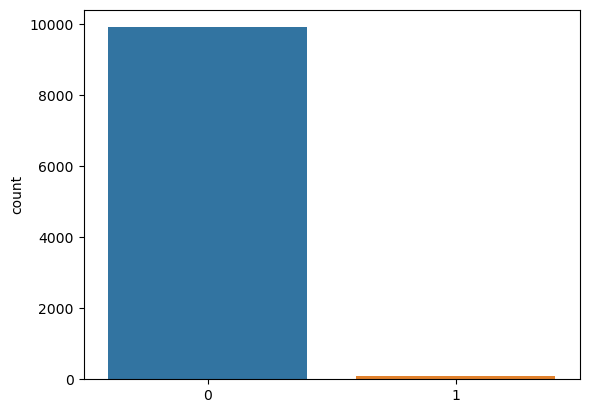

In [4]:
sns.countplot(x=y)

### Over Sampling

sampling_strategy  : 리샘플링 후 다수 클래스 샘플 수에 대한 소수 클래스 샘플 수의 원하는 비율  

- minority class 를 oversampling 하여 normal(0) : abnormal(1) = 2:1 이 되도록 resample

In [5]:
oversample = RandomOverSampler(sampling_strategy=0.5)

x_over, y_over = oversample.fit_resample(X,y)
x_over.shape, y_over.shape, Counter(y_over)

((14850, 10), (14850,), Counter({0: 9900, 1: 4950}))

<AxesSubplot:ylabel='count'>

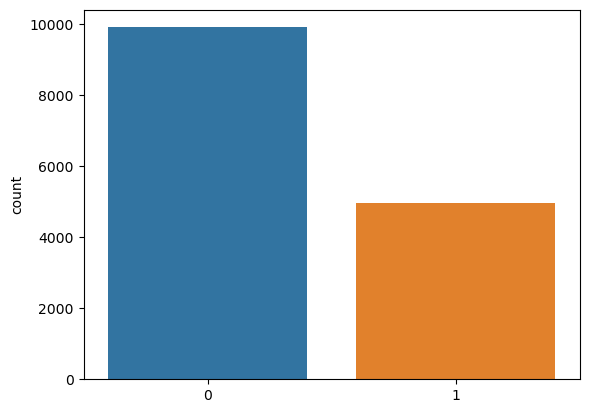

In [6]:
sns.countplot(x=y_over)

### Under Sampling

sampling_strategy : `majority`: 다수 클래스만 리샘플링 

- majority class 를 undersample 하여 normal(0) : abnormal(1) = 1:1 이 되도록 resample

In [7]:
undersample = RandomUnderSampler(sampling_strategy='majority')

x_under, y_under = undersample.fit_resample(X,y)
x_under.shape, y_under.shape, Counter(y_under)

((200, 10), (200,), Counter({0: 100, 1: 100}))

<AxesSubplot:ylabel='count'>

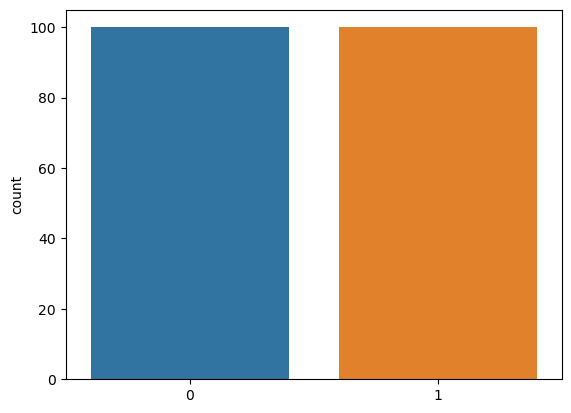

In [8]:
sns.countplot(x=y_under)

## Random Oversampling 과 Undersampling을 동시 적용
- 소수 class 를 oversampling 하여 normal(0) : abnormal(1) = 10:1 이 되도록 하고,  
- 다수 class 를 undersampling 하여 normal(0) : abnormal(1) = 2:1 이 되도록 한다.

In [9]:
# 불균형 데이터셋 생성 99:1
X, y = make_classification(n_samples=10000, n_features=10, n_classes=2,
                           weights=(0.99,), flip_y=0.0, random_state=0)

X.shape, y.shape, Counter(y)

((10000, 10), (10000,), Counter({0: 9900, 1: 100}))

In [10]:
# 이상치 데이터를 oversampling 10:1
oversample = RandomOverSampler(sampling_strategy=0.1)

X, y = oversample.fit_resample(X,y)
X.shape, y.shape, Counter(y)

((10890, 10), (10890,), Counter({0: 9900, 1: 990}))

In [11]:
# 정상 데이터를 undersampling 2:1
undersample = RandomUnderSampler(sampling_strategy=0.5)

X, y = undersample.fit_resample(X,y)
X.shape, y.shape, Counter(y)

((2970, 10), (2970,), Counter({0: 1980, 1: 990}))

<AxesSubplot:ylabel='count'>

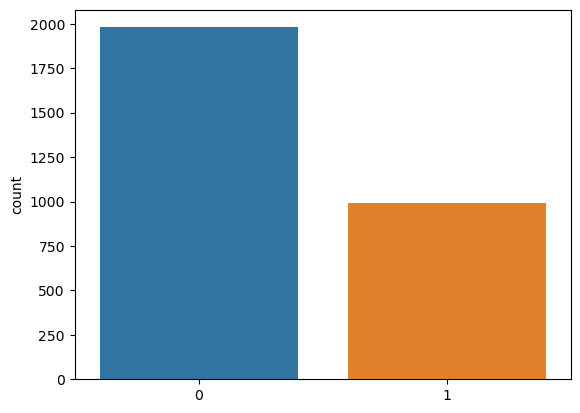

In [12]:
sns.countplot(x=y)

### 임의의 n-class 분류 문제를 생성
- normal(0) : abnormal(1) = 99:1 의 비율로 data 생성

In [13]:
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2,
                           weights=(0.99,), flip_y=0.0, random_state=0)

X.shape, y.shape, Counter(y)

((1000, 10), (1000,), Counter({0: 990, 1: 10}))

## SMOTE (Synthetic Minority Over-Sampling Technique) 적용

http://www.incodom.kr/SMOTE

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_over, y_over = smote.fit_resample(X,y)

print("before SMOTE :", X.shape, y.shape, Counter(y))
print("after SMOTE :", X_over.shape, y_over.shape, Counter(y_over))

before SMOTE : (1000, 10) (1000,) Counter({0: 990, 1: 10})
after SMOTE : (1980, 10) (1980,) Counter({0: 990, 1: 990})


<AxesSubplot:ylabel='count'>

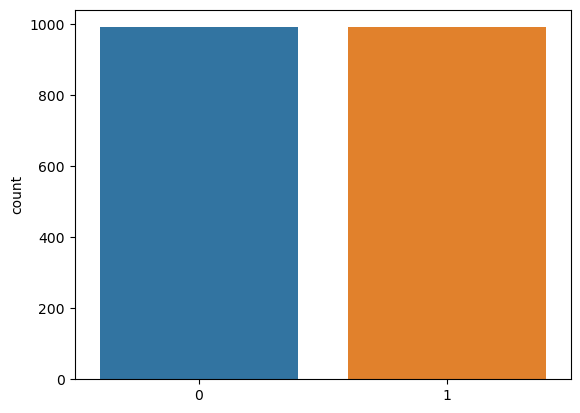

In [15]:
sns.countplot(x=y_over)

- SMOTE 적용 전, 후 분포 시각화  

- 시각화를 위해 2 차원으로 축소

In [16]:
from sklearn.decomposition import PCA

# 10차원(n_features=10)을 2차원 공간으로 맵핑
pca = PCA(n_components=2, random_state=0)
x_pca = pca.fit_transform(X)
x_pca.shape, y.shape, Counter(y)

((1000, 2), (1000,), Counter({0: 990, 1: 10}))

In [17]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['r','b'])

x_pca

array([[ 2.43820331,  0.44925931],
       [ 1.19656967,  2.13160712],
       [ 0.33035386,  1.19695659],
       ...,
       [-1.26065909,  0.21941252],
       [-0.59253496, -0.14038923],
       [-1.28972963, -0.89645257]])

In [18]:
x_pca[y==0].shape, x_pca[y==1].shape

((990, 2), (10, 2))

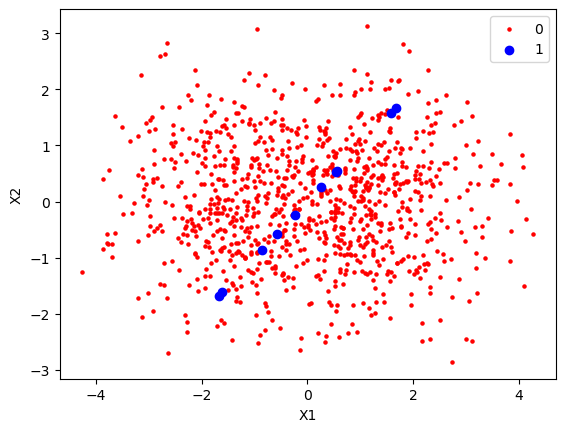

In [19]:
X1, X2 = x_pca[y==0,0], x_pca[y==0,1]
plt.scatter(X1,X2, s=5, color=cmap(0), label=0)

X1, X2 = x_pca[y==1,0], x_pca[y==1,0]
plt.scatter(X1,X2, color=cmap(1), label=1)

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

SMOTE 적용전 original data 시각화

SMOTE 적용 후 data 시각화

In [20]:
pca = PCA(n_components=2, random_state=0)
x_pca = pca.fit_transform(X_over)
x_pca.shape, y_over.shape, Counter(y_over)

((1980, 2), (1980,), Counter({0: 990, 1: 990}))

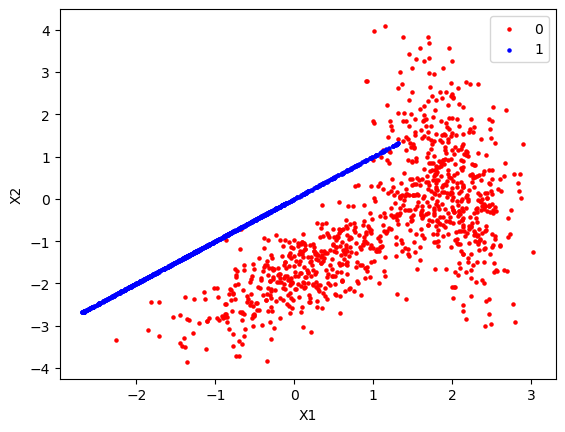

In [21]:
X1, X2 = x_pca[y_over==0,0], x_pca[y_over==0,1]
plt.scatter(X1,X2, s=5, color=cmap(0), label=0)

X1, X2 = x_pca[y_over==1,0], x_pca[y_over==1,0]
plt.scatter(X1,X2, s=5, color=cmap(1), label=1)

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()